In [60]:
#general libabray 
import pandas as pd
import numpy as np

#model
#random forest for feature importance
from sklearn.ensemble import RandomForestRegressor

import utility_fct

#measure and split tool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#import dataset:
train = pd.read_json("/Users/Yannick/Desktop/Kaggle_covid/stanford-covid-vaccine/train.json",lines=True)
test = pd.read_csv('/Users/Yannick/Desktop/Kaggle_covid/test_final.csv') # test files after transformation, with all the labels
test_org = pd.read_json('/Users/Yannick/Desktop/Kaggle_covid/stanford-covid-vaccine/test.json',lines=True) # original test file
train_seq = pd.read_csv('/Users/Yannick/Desktop/Kaggle_covid/train_model.csv')


In [98]:
test.shape

(457953, 29)

In [62]:
#test_sub = utility_fct.expend_feature_test(test_org) #transform test data set for submission form and with the right idseq columns

y = train_seq.loc[:,["reactivity","deg_Mg_pH10","deg_pH10","deg_Mg_50C","deg_50C"]] 

In [63]:
"""train = pd.read_json("/Users/Yannick/Desktop/Kaggle_covid/stanford-covid-vaccine/train.json",lines=True)
seq = utility_fct.fianle_transform(train)
letters_loop_type=['E','H','I','M','S','X']

def ajout_N_predicted_loop(data):
    for i in letters_loop_type:
        col = np.where(data[i]==1, data['N'], 0) 
        data ["N_"+i] = col
    col_B=np.where(data.N_E+data.N_H+data.N_I+data.N_M+data.N_S+data.N_X==0,data.N,0)
    data["N_B"]=col_B
    return data

seq=ajout_N_predicted_loop(seq)
seq.head()"""

'train = pd.read_json("/Users/Yannick/Desktop/Kaggle_covid/stanford-covid-vaccine/train.json",lines=True)\nseq = utility_fct.fianle_transform(train)\nletters_loop_type=[\'E\',\'H\',\'I\',\'M\',\'S\',\'X\']\n\ndef ajout_N_predicted_loop(data):\n    for i in letters_loop_type:\n        col = np.where(data[i]==1, data[\'N\'], 0) \n        data ["N_"+i] = col\n    col_B=np.where(data.N_E+data.N_H+data.N_I+data.N_M+data.N_S+data.N_X==0,data.N,0)\n    data["N_B"]=col_B\n    return data\n\nseq=ajout_N_predicted_loop(seq)\nseq.head()'

In [64]:
train_seq.columns

Index(['reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C', 'C',
       'G', 'U', 'E', 'H', 'I', 'M', 'S', 'X', ')', '.', 'N_E', 'N_H', 'N_I',
       'N_M', 'N_S', 'N_X', 'N_B', 'N_base_A', 'N_base_C', 'N_base_G',
       'N_base_U', 'N_point'],
      dtype='object')

In [65]:
def evaluate(model, test_features, test_y):
    """
    model evaluation with MCRMSC mertric
    """
    predictions = model.predict(test_features)
    mcrmsc = utility_fct.mcrmsc_yannick(test_y, predictions)[0]
    print(str(model) + 'Performance')
    print('MCRMSC: {:0.4f} '.format(mcrmsc))
    return mcrmsc

In [66]:
def y_pred_df(model, test_feature, test_file):
    """
    generation of submission predicitin dataframe with good format
    """
    y_pred_test = model.predict(test_feature)
    y_pred_df_random = pd.DataFrame(y_pred_test, columns= ['reactivity', 
            'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C'])
    y_pred_df_random.insert(0, "id_seqpos", test_file['id'], True) 
    
    return (y_pred_df_random)

,importance
feature,
.,0.317
G,0.246
S,0.231
E,0.139
I,0.024
C,0.023
H,0.008
U,0.007
X,0.002


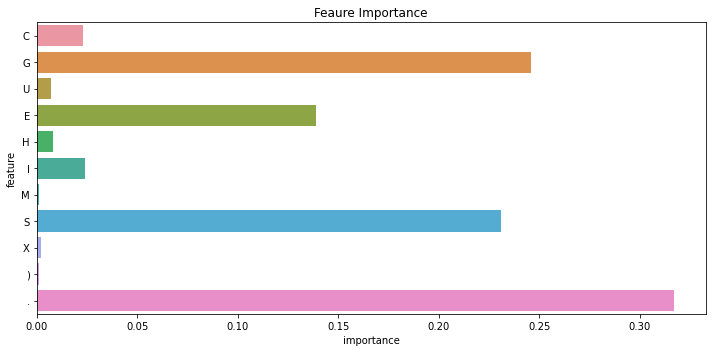

In [67]:
# model_1 
model_1 = RandomForestRegressor(random_state=42)
features_1 = ['C', 'G', 'U','E', 'H', 'I', 'M', 'S', 'X', ')', '.']

X_1 =train_seq.loc[:,features_1]

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, test_size=0.25, random_state=1,shuffle=False)

model_1.fit(X_1_train, y_1_train)
importances = pd.DataFrame({'feature':features_1 ,'importance':np.round(model_1.feature_importances_,3)})
plt.figure(figsize=(10, 5))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.title('Feaure Importance')
plt.tight_layout()
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

In [28]:
y_1_pred = model.predict(X_1_test)
evaluate(model, X_1_test, y_1_test)

Model Performance
MCRMSC: 0.4208 


0.42075388134121117

In [78]:
#for generating submission 
y_pred_test = y_pred_df(model_1, test.loc[:,features_1], test_sub)
y_pred_df_random.to_csv('sub_random_none.csv', index=False)

## Model 2 avec tout nos features 

,importance
feature,
N_E,0.164
N_point,0.164
.,0.128
N_S,0.121
N_base_G,0.102
E,0.082
S,0.062
N_base_A,0.036
N_H,0.027


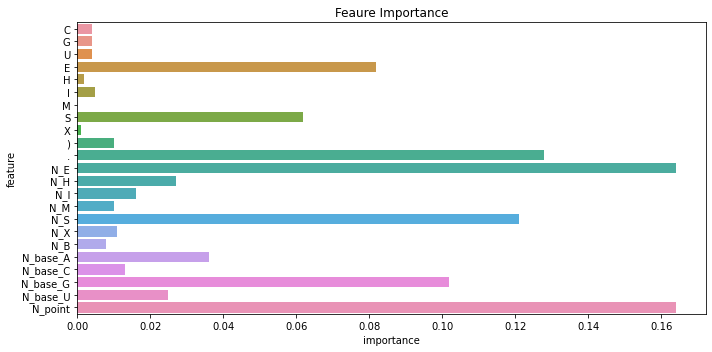

In [69]:
#model_2
model_2 = RandomForestRegressor(random_state=42)
features_2 = ['C','G', 'U', 'E', 'H', 'I', 'M', 'S', 'X', ')', '.', 'N_E', 'N_H', 'N_I',
       'N_M', 'N_S', 'N_X', 'N_B', 'N_base_A', 'N_base_C', 'N_base_G',
       'N_base_U', 'N_point']

X_2 =train_seq.loc[:,features_2]
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.25, random_state=1,shuffle=False)

model_2.fit(X_2_train, y_2_train)

importances = pd.DataFrame({'feature':features_2 ,'importance':np.round(model_2.feature_importances_,3)})
plt.figure(figsize=(10, 5))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.title('Feaure Importance')
plt.tight_layout()
plt.savefig('Feaure.png')
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

In [70]:
y_pred_model_2 = y_pred_df(model_2, test.loc[:,features_2], test_sub)
evaluate(model_2, X_2_test, y_2_test)

RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.3880 


0.3880366138807163

In [80]:
y_pred_model_2

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.639007,0.838696,2.220180,0.870372,0.914860
1,id_00073f8be_1,0.639007,0.838696,2.220180,0.870372,0.914860
2,id_00073f8be_2,0.714905,0.635304,0.808550,1.017350,0.822645
3,id_00073f8be_3,0.714905,0.635304,0.808550,1.017350,0.822645
4,id_00073f8be_4,0.714905,0.635304,0.808550,1.017350,0.822645
...,...,...,...,...,...,...
457948,id_ffda94f24_125,0.330284,0.307984,0.301520,0.332196,0.374193
457949,id_ffda94f24_126,0.278711,0.541998,0.480372,0.565051,0.491484
457950,id_ffda94f24_127,0.330284,0.307984,0.301520,0.332196,0.374193
457951,id_ffda94f24_128,0.330284,0.307984,0.301520,0.332196,0.374193


In [79]:
y_pred_model_2.to_csv('sub_random_tout.csv', index=False)

## Model 3 avec seulement les comptages 

In [83]:
#model_3
model_3 = RandomForestRegressor( random_state=42)
features_3 = [ 'N_E', 'N_H', 'N_I',
       'N_M', 'N_S', 'N_X', 'N_B', 'N_base_A', 'N_base_C', 'N_base_G',
       'N_base_U', 'N_point']

X_3 =train_seq.loc[:,features_3]
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y, test_size=0.25, random_state=1,shuffle=False)


model_3.fit(X_3_train, y_3_train)
#importances = pd.DataFrame({'feature':features_3 ,'importance':np.round(model_3.feature_importances_,3)})
#plt.figure(figsize=(10, 5))
#sns.barplot(x=importances['importance'], y=importances['feature'])
#plt.title('Feaure Importance')
#plt.tight_layout()
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances

RandomForestRegressor(random_state=42)

In [75]:
y_pred_model_3 = y_pred_df(model_3, test.loc[:,features_3], test_sub)
evaluate(model_3, X_3_test, y_3_test)

RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.3877 


0.3876500754951973

In [81]:
y_pred_model_3

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.618391,0.846595,2.223038,0.885596,0.923264
1,id_00073f8be_1,0.618391,0.846595,2.223038,0.885596,0.923264
2,id_00073f8be_2,0.735501,0.630096,0.816575,0.992634,0.822178
3,id_00073f8be_3,0.735501,0.630096,0.816575,0.992634,0.822178
4,id_00073f8be_4,0.735501,0.630096,0.816575,0.992634,0.822178
...,...,...,...,...,...,...
457948,id_ffda94f24_125,0.344218,0.297816,0.290420,0.331857,0.357388
457949,id_ffda94f24_126,0.290615,0.544915,0.460596,0.567514,0.473754
457950,id_ffda94f24_127,0.344218,0.297816,0.290420,0.331857,0.357388
457951,id_ffda94f24_128,0.344218,0.297816,0.290420,0.331857,0.357388


In [87]:
y_pred_model_3.to_csv('sub_random_count.csv', index=False)

## Model 4: Suppression de N_point par rapport a feature 2

,importance
feature,
N_E,0.319
.,0.209
G,0.146
N_S,0.130
S,0.084
N_H,0.023
C,0.021
N_I,0.019
E,0.016


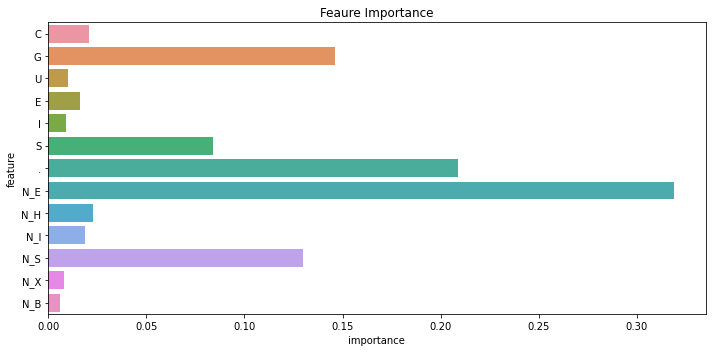

In [42]:
model_4 = RandomForestRegressor( random_state=42)
features_4 = [ 'C', 'G', 'U','E', 'I', 'S', '.', 'N_E', 'N_H', 'N_I','N_S', 'N_X', 'N_B']
X_4 =train_seq.loc[:,features_4]

X_4_train, X_4_test, y_4_train, y_4_test = train_test_split(X_4, y, test_size=0.25, random_state=1,shuffle=False)
model_4.fit(X_4_train, y_4_train)

importances = pd.DataFrame({'feature':features_4 ,'importance':np.round(model_4.feature_importances_,3)})
plt.figure(figsize=(10, 5))
sns.barplot(x=importances['importance'], y=importances['feature'])
plt.title('Feaure Importance')
plt.tight_layout()
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

In [43]:
y_pred_model_4 = y_pred_df(model_4, test.loc[:,features_4], test_sub)
evaluate(model_4, X_4_test, y_4_test)

Model Performance
MCRMSC: 0.3934 


0.3934287995211152

In [99]:
MCRMSC_1 = evaluate(model_1, X_1_test, y_1_test)
MCRMSC_2 = evaluate(model_2, X_2_test, y_2_test)
MCRMSC_3 = evaluate(model_3, X_3_test, y_3_test)
MCRMSC_4 = evaluate(model_4, X_4_test, y_4_test)

RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.4208 
RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.3880 
RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.3877 
RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.3934 


In [77]:
print('Improvement of {:0.2f}%.'.format(abs(100 * (MCRMSC_2- MCRMSC_1) /MCRMSC_1)))

Improvement of 7.78%.


On voit que dans le 3 derniere model, il y a pas d'amelioration entre eux. Mais il y a bien une amelioration des performence par rapport a un simple one hot encoding des varaibles.

In [95]:
model_5 = RandomForestRegressor( random_state=42)
features_5 = [ 'C','G', 'U', 'E', 'H', 'I', 'M', 'S', 'X', ')', '.', 'N_H', 'N_I',
       'N_M', 'N_X', 'N_B', 'N_base_A', 'N_base_C', 'N_base_G',
       'N_base_U']

X_5 =train_seq.loc[:,features_5]
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y, test_size=0.25, random_state=1,shuffle=False)


model_5.fit(X_5_train, y_5_train)

RandomForestRegressor(random_state=42)

In [96]:
y_pred_model_5 = y_pred_df(model_5, test.loc[:,features_5], test_sub)
evaluate(model_5, X_5_test, y_5_test)

RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.4011 


0.4011470457962222

In [97]:
y_pred_model_5.to_csv('sub_random_pe.csv', index=False)

## Selection des meuilleuri parametre pour le model Random forest, selon les features 4 

In [52]:
# Number of trees in Random Forest
rf_n_estimators = [100, 250, 500]
# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 15, 3)]
rf_max_depth.append(None)
# Add the default as a possible value
# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt']
#“auto”then max_features=n_features

# Criterion to split on
rf_criterion = ['mse']

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_impurity_decrease': rf_min_impurity_decrease}

Creating 48 = the total combination of parameter, so it's not a random search

In [53]:
# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 48, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)


In [54]:
rf_random.fit(X_4_train, y_4_train)

#View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'n_estimators': 500,
 'min_impurity_decrease': 0.0,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'mse'}

In [55]:
model_opt = rf_random.best_estimator_

In [57]:
base_MCRMSC =evaluate(model_4, X_4_test, y_4_true)
opt_MCRMSC = evaluate(model_opt, X_4_test, y_4_true)

RandomForestRegressor(random_state=42)Performance
MCRMSC: 0.3934 
RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500)Performance
MCRMSC: 0.3926 


In [58]:
print('Improvement of {:0.2f}%.'.format( 100 * (base_MCRMSC - opt_MCRMSC) / base_MCRMSC))

Improvement of 0.22%.


Finalement on adopte le modele avec l'optimization des parametres de random forest.

In [ ]:
y_pred_model_opt = y_pred_df(model_opt, test.loc[:,features_4], test_sub)
y_pred_model_opt.head()

In [ ]:
y_pred_model_opt.to_csv('sub_random_opt.csv', index=False)

In [ ]:
estimator = model_4.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
image_tree = export_graphviz(estimator, out_file='tree.dot', 
                feature_names = test.loc[:,features_4].columns,
                class_names = ["reactivity","deg_Mg_pH10","deg_pH10","deg_Mg_50C","deg_50C"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
estimator = model_opt.estimators_[2]
from sklearn.tree import export_graphviz
# Export as dot file
image_tree = export_graphviz(estimator, out_file='tree_opt.dot', 
                feature_names = test.loc[:,features_4].columns,
                class_names = ["reactivity","deg_Mg_pH10","deg_pH10","deg_Mg_50C","deg_50C"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_opt.dot', '-o', 'tree_opt.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_opt.png')

In [ ]:
y_pred_model_opt = y_pred_df(model_opt, test.loc[:,features_4], test_sub)
y_pred_model_4.head()

In [ ]:
y_pred_model_4.to_csv('sub_random_opt.csv', index=False)